<a href="https://colab.research.google.com/github/Kalyan1902/DeepLearning/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [38]:
import pandas_datareader as pdr
key ='e999527d80479cdc0eba767298a4bb047e328ccb'


In [39]:
df = pdr.get_data_tiingo('AMZN',api_key =key)
df.to_csv('AMZN.csv')
df.head()

<ipython-input-39-52a17115a986>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AMZN',api_key =key)


close     high      low     open   volume  \
symbol date                                                                     
AMZN   2019-03-07 00:00:00+00:00  1625.95  1669.75  1620.51  1667.37  4957017   
       2019-03-08 00:00:00+00:00  1620.80  1622.72  1586.57  1604.01  4667014   
       2019-03-11 00:00:00+00:00  1670.62  1672.29  1626.01  1626.12  3876352   
       2019-03-12 00:00:00+00:00  1673.10  1684.27  1660.98  1669.00  3614498   
       2019-03-13 00:00:00+00:00  1690.81  1700.00  1679.35  1683.00  3552041   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
AMZN   2019-03-07 00:00:00+00:00   81.2975  83.4875  81.0255  83.3685   
       2019-03-08 00:00:00+00:00   81.0400  81.1360  79.3285  80.2005   
       2019-03-11 00:00:00+00:00   83.5310  83.6145  81.3005  81.3060   
       2019-03-12 00:00:00+00:00   83.6550  84.2135  83.0490  83.4500   
       2019-03-13 00:00:00+00:00   84.5405  85.0000  83.9675  84.1500   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AMZN   2019-03-07 00:00:00+00:00   99140340      0.0          1.0  
       2019-03-08 00:00:00+00:00   93340280      0.0          1.0  
       2019-03-11 00:00:00+00:00   77527040      0.0          1.0  
       2019-03-12 00:00:00+00:00   72289960      0.0          1.0  
       2019-03-13 00:00:00+00:00   71040820      0.0          1.0

In [40]:
df.shape

(1257, 12)

In [41]:
df1 = df.close.values.astype('float32')


In [42]:
df1.shape

(1257,)

In [43]:
df1 = df1.reshape(1257,1)
df1.shape

(1257, 1)

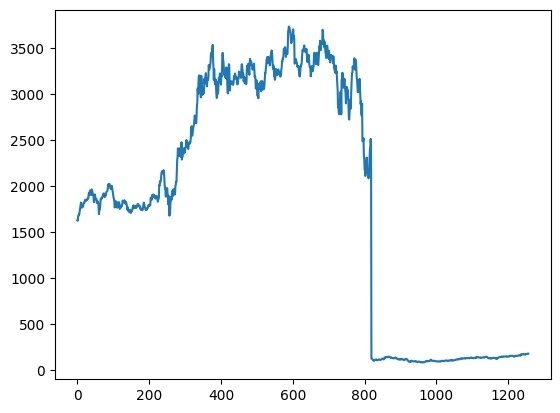

In [44]:

plt.plot(df1)
plt.show()


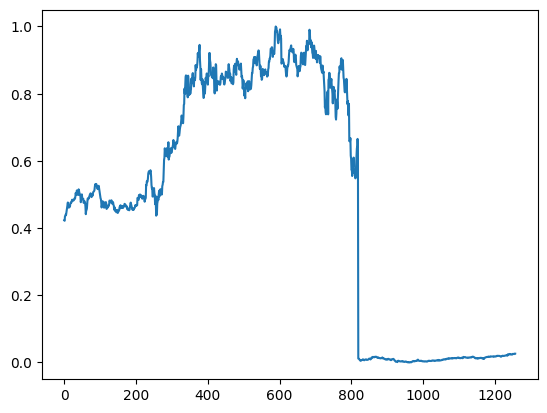

In [45]:
scaler = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(df1)
plt.plot(df1)
plt.show()

In [46]:
train_size = int(len(df1)*0.80)
test_size = len(df1)-train_size
train,test =df1[0:train_size],df1[train_size:len(df1),:]
print(len(train),len(test))

1005 252


In [47]:
def create_dataset(dataset,look_back =1):
  datax,datay =[],[]
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    datax.append(a)
    datay.append(dataset[i+look_back,0])
  return np.array(datax),np.array(datay)

In [48]:
look_back =1
trainx,trainy =create_dataset(train,look_back)
testx,testy =create_dataset(test,look_back)

In [49]:
trainX = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testX = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))  # Assuming 1 feature
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

print('compilation time:',time.time()-start)

compilation time: 4502.829185724258


In [51]:
model.fit(trainx,trainy,batch_size=128,epochs=50,validation_split =0.05)

Epoch 1/50
8/8 [==============================] - 6s 162ms/step - loss: 0.4142 - val_loss: 0.0047
Epoch 2/50
8/8 [==============================] - 0s 17ms/step - loss: 0.3119 - val_loss: 0.0171
Epoch 3/50
8/8 [==============================] - 0s 17ms/step - loss: 0.2191 - val_loss: 0.0402
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.1368 - val_loss: 0.0746
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0772 - val_loss: 0.1135
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0484 - val_loss: 0.1449
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.1568
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0348 - val_loss: 0.1373
Epoch 9/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0310 - val_loss: 0.1205
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0273 - val_loss: 0.0993
Epoch 11/50
8/8 [===========

1/1 [==============================] - 1s 929ms/step
[[0.01858875]]
1/1 [==============================] - 1s 922ms/step
[[-0.14776641]]
1/1 [==============================] - 0s 26ms/step
[[-0.5165942]]
1/1 [==============================] - 0s 31ms/step
[[-1.2638338]]
1/1 [==============================] - 0s 29ms/step
[[-2.572025]]
1/1 [==============================] - 0s 29ms/step
[[  149.66132]
 [ -457.46677]
 [-1803.5369 ]
 [-4530.655  ]
 [-9305.017  ]]


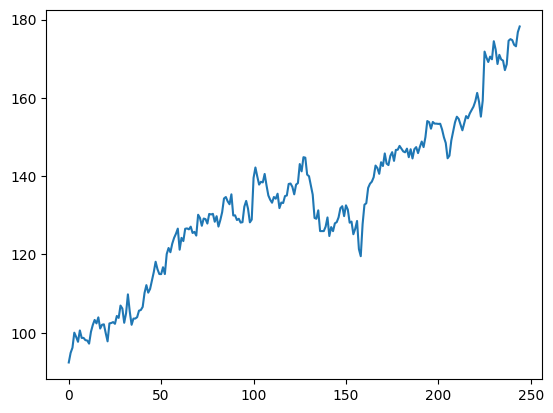

In [52]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testy, predict_length)